In [1]:
import imutils
import argparse
import time
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# a idéia disso é dar resize na imagem mas não é necessário
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
    '''# keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)

        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        # yield the next image in the pyramid
        yield image'''

In [3]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [4]:
sizeWin = 64
stepSize = int(sizeWin/2)
(winW, winH) = (sizeWin, sizeWin)

In [5]:
def iteraSobreTodasImagens():
    # argument parser
    #ap = argparse.ArgumentParser()
    #ap.add_argument("-i", "--image", required=True, help="Path to the image")
    #args = vars(ap.parse_args())

    # carrega image e define altura e largura da janela
    # image = cv2.imread(args["image"])
    
    filenames = glob.glob("/home/kruger/4o-ano/ia/machine-learning/datasets/placas/*.jpg")
    filenames.sort()
    images = [cv2.imread(img) for img in filenames]

    for image in images:
        # loop da sliding window
        for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
            # if the window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue

            cv2.imwrite("/home/kruger/4o-ano/ia/machine-learning/datasets/placas/123.jpg", window)
            
            # CLASSIFICADOR/EXTRATOR AQUI

            # extrair características de window
            clone = image.copy()
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            cv2.imshow("Window", clone)
            cv2.waitKey(1)
            time.sleep(0.025)
        cv2.destroyAllWindows()

In [6]:
def iteraSobreImagem():
    # argument parser 
    # ap = argparse.ArgumentParser()
    # ap.add_argument("-i", "--image", required=True, help="Caminho para a imagem")
    # args = vars(ap.parse_args())

    # carrega imagem e define altura e largura da janela 
    #image = cv2.imread(args["image"])
    image = cv2.imread("/home/kruger/4o-ano/ia/machine-learning/datasets/placas/test_002.jpg")

    for image in pyramid(image):
        # loop de sliding window 
        for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
            # ignora se a janela nao obedece o tamanho certo
            if window.shape[0] != winH or window.shape[1] != winW:
                continue

            cv2.imwrite("/home/kruger/4o-ano/ia/machine-learning/datasets/placas/123.jpg", window)
            
            
            ## O CLASSIFICADOR/EXTRATOR VAI AQUI

            # extrair características de window
            # desenha a janela
            clone = image.copy()
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            cv2.imshow("Window", clone)
            cv2.waitKey(1)
            time.sleep(0.025)
        cv2.destroyAllWindows()

In [7]:
def extraiHSV(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    return hist

In [8]:
iteraSobreImagem()

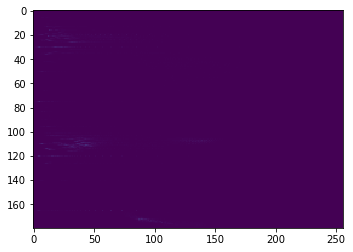

array([[  5.75400000e+03,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [9]:
hist = extraiHSV(cv2.imread("/home/kruger/4o-ano/ia/machine-learning/datasets/placas/test_002.jpg"))
plt.imshow(hist,interpolation = 'nearest')
plt.show()
hist.size